In [1]:
import networkx as nx
from collections import deque
import heapq

# Estado: (lobo, cabra, col, granjero), cada uno en 'L' (izquierda) o 'R' (derecha)
def es_valido(estado):
    l, c, col, g = estado
    # Si el granjero no está con la cabra y el lobo está con la cabra → no válido
    if g != c and l == c:
        return False
    # Si el granjero no está con la cabra y la cabra está con la col → no válido
    if g != c and c == col:
        return False
    return True

# Generar todos los estados posibles
from itertools import product
estados_posibles = list(product(['L', 'R'], repeat=4))
estados_validos = [s for s in estados_posibles if es_valido(s)]

# Generar grafo de estados válidos con transiciones
G = nx.DiGraph()
for estado in estados_validos:
    for i in range(4):  # 0=lobo, 1=cabra, 2=col, 3=granjero
        if estado[i] == estado[3]:  # Puede llevar al lobo, cabra, col o ir solo
            nuevo = list(estado)
            nuevo[3] = 'R' if estado[3] == 'L' else 'L'  # Cambiar lado del granjero
            if i != 3:
                nuevo[i] = nuevo[3]  # Cambiar también lo que lleva
            nuevo_estado = tuple(nuevo)
            if nuevo_estado in estados_validos:
                G.add_edge(estado, nuevo_estado)

inicio = ('L', 'L', 'L', 'L')
final = ('R', 'R', 'R', 'R')

# BFS
def bfs(grafo, inicio, final):
    visitados = set()
    cola = deque([(inicio, [inicio])])
    while cola:
        actual, camino = cola.popleft()
        if actual == final:
            return camino
        if actual in visitados:
            continue
        visitados.add(actual)
        for vecino in grafo.neighbors(actual):
            cola.append((vecino, camino + [vecino]))
    return None

# DFS
def dfs(grafo, inicio, final):
    visitados = set()
    pila = [(inicio, [inicio])]
    while pila:
        actual, camino = pila.pop()
        if actual == final:
            return camino
        if actual in visitados:
            continue
        visitados.add(actual)
        for vecino in grafo.neighbors(actual):
            pila.append((vecino, camino + [vecino]))
    return None

# A* (usamos como heurística: cantidad de elementos en el lado incorrecto)
def heuristica(estado):
    return sum(1 for x in estado if x == 'L')

def astar(grafo, inicio, final):
    visitados = set()
    heap = [(heuristica(inicio), 0, inicio, [inicio])]
    while heap:
        _, costo, actual, camino = heapq.heappop(heap)
        if actual == final:
            return camino
        if actual in visitados:
            continue
        visitados.add(actual)
        for vecino in grafo.neighbors(actual):
            nuevo_costo = costo + 1
            heur = heuristica(vecino) + nuevo_costo
            heapq.heappush(heap, (heur, nuevo_costo, vecino, camino + [vecino]))
    return None

# Ejecutar y mostrar resultados
for nombre, algoritmo in [('BFS', bfs), ('DFS', dfs), ('A*', astar)]:
    camino = algoritmo(G, inicio, final)
    print(f"\n🔍 {nombre} encontró una solución en {len(camino)-1} pasos:")
    for paso in camino:
        print(paso)



🔍 BFS encontró una solución en 7 pasos:
('L', 'L', 'L', 'L')
('L', 'R', 'L', 'R')
('L', 'R', 'L', 'L')
('R', 'R', 'L', 'R')
('R', 'L', 'L', 'L')
('R', 'L', 'R', 'R')
('R', 'L', 'R', 'L')
('R', 'R', 'R', 'R')

🔍 DFS encontró una solución en 7 pasos:
('L', 'L', 'L', 'L')
('L', 'R', 'L', 'R')
('L', 'R', 'L', 'L')
('L', 'R', 'R', 'R')
('L', 'L', 'R', 'L')
('R', 'L', 'R', 'R')
('R', 'L', 'R', 'L')
('R', 'R', 'R', 'R')

🔍 A* encontró una solución en 7 pasos:
('L', 'L', 'L', 'L')
('L', 'R', 'L', 'R')
('L', 'R', 'L', 'L')
('L', 'R', 'R', 'R')
('L', 'L', 'R', 'L')
('R', 'L', 'R', 'R')
('R', 'L', 'R', 'L')
('R', 'R', 'R', 'R')


Algoritmos de búsqueda que mejor se adaptan al problema son BFS y A*, ya que ambos son óptimos para encontrar la solución más corta en un grafo no ponderado. DFS puede ser menos eficiente en este caso, ya que puede explorar caminos largos sin encontrar la solución rápidamente. Los algoritmos como los de fuerza bruta no son ideales para este caso porque tienen restricciones lógicas fuertes, a pesar de ser de mundo pequeño. 

/Users/dicordova/opt/anaconda3/envs/DataScience/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127753 (\N{BRIDGE AT NIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


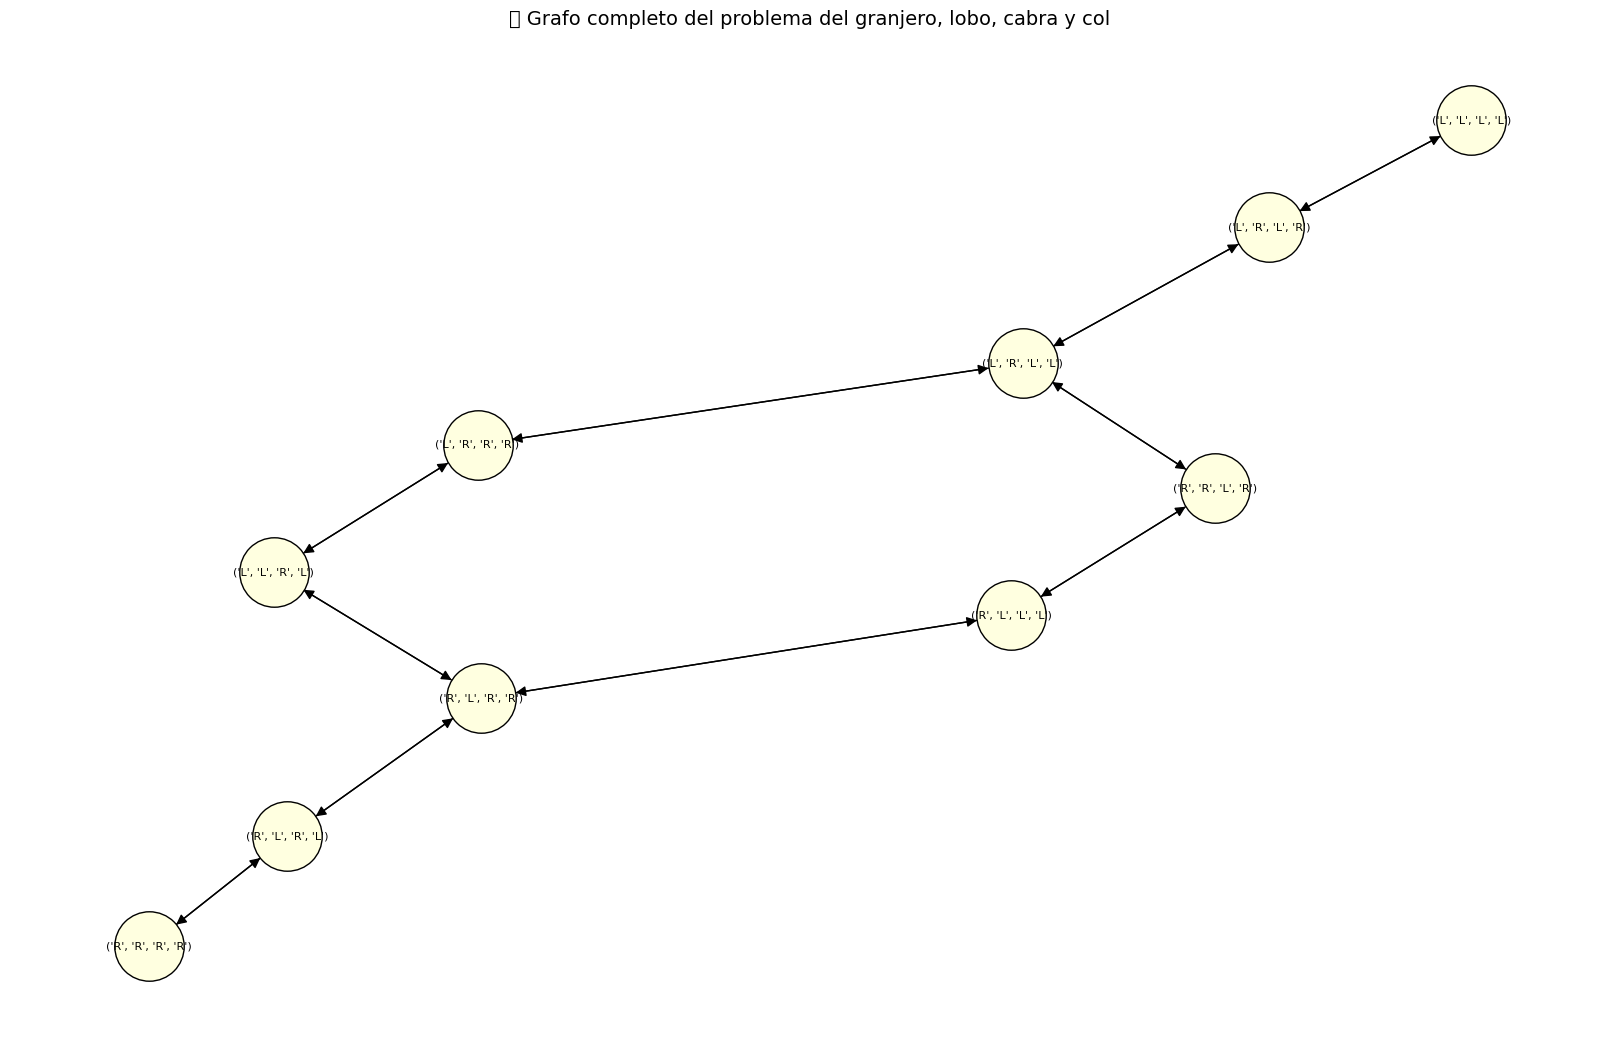

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import product

# Validar si un estado es seguro
def es_valido(estado):
    l, c, col, g = estado
    if g != c and l == c:
        return False
    if g != c and c == col:
        return False
    return True

# Generar todos los estados posibles (2^4)
estados_posibles = list(product(['L', 'R'], repeat=4))
estados_validos = [s for s in estados_posibles if es_valido(s)]

# Crear grafo dirigido de transiciones válidas
G = nx.DiGraph()

for estado in estados_validos:
    for i in range(4):  # 0=lobo, 1=cabra, 2=col, 3=granjero
        if estado[i] == estado[3]:  # si puede llevar ese ítem
            nuevo = list(estado)
            nuevo[3] = 'R' if estado[3] == 'L' else 'L'
            if i != 3:
                nuevo[i] = nuevo[3]
            nuevo_estado = tuple(nuevo)
            if nuevo_estado in estados_validos:
                G.add_edge(estado, nuevo_estado)

# Posiciones automáticas (puedes probar con shell o spring layout)
pos = nx.spring_layout(G, seed=42)  # reproducible

# Dibujar grafo completo
plt.figure(figsize=(16, 10))
nx.draw(
    G, pos,
    with_labels=True,
    node_color='lightyellow',
    node_size=2500,
    edgecolors='black',
    arrows=True,
    arrowstyle='-|>',
    arrowsize=15,
    font_size=8
)
plt.title("🌉 Grafo completo del problema del granjero, lobo, cabra y col", fontsize=14)
plt.axis('off')
plt.show()
